In [47]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
data = load_breast_cancer()

In [49]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## understanding the dataset

In [50]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
# taking the first datapoint

In [52]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [53]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [54]:
data.target[0]

0

In [55]:
data.target_names[0]

'malignant'

In [56]:
# Features and target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [57]:
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [58]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Splitting the data into Training and Validation Sets

In [59]:
X = df.drop('target',axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [60]:
len(X_train)

455

In [61]:
len(y_train)

455

### building the model (classifier)

In [62]:
Knn = KNeighborsClassifier(n_neighbors = 3)

### training the model 

In [63]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### finding the accuracy of our model

In [64]:
Knn.score(X_test,y_test)

0.9298245614035088

In [65]:
# Find the best K value

best_score = 0
best_k = 0
scores = []
for k in range(1,100):
    Knn = KNeighborsClassifier(n_neighbors = k)
    Knn.fit(X_train,y_train)
    score = Knn.score(X_test,y_test)
    scores.append(score)
    if score>best_score:
        best_score = score
        best_k = k
    print(f"K = {k} socre ={score}")
    
print(f" \nbest k = {best_k} ==> best score = {best_score}")

K = 1 socre =0.9298245614035088
K = 2 socre =0.9298245614035088
K = 3 socre =0.9298245614035088
K = 4 socre =0.9385964912280702
K = 5 socre =0.956140350877193
K = 6 socre =0.9649122807017544
K = 7 socre =0.956140350877193
K = 8 socre =0.956140350877193
K = 9 socre =0.956140350877193
K = 10 socre =0.9736842105263158
K = 11 socre =0.9824561403508771
K = 12 socre =0.9824561403508771
K = 13 socre =0.9736842105263158
K = 14 socre =0.9736842105263158
K = 15 socre =0.9649122807017544
K = 16 socre =0.9649122807017544
K = 17 socre =0.9649122807017544
K = 18 socre =0.9649122807017544
K = 19 socre =0.9649122807017544
K = 20 socre =0.9649122807017544
K = 21 socre =0.9649122807017544
K = 22 socre =0.9649122807017544
K = 23 socre =0.956140350877193
K = 24 socre =0.9649122807017544
K = 25 socre =0.9473684210526315
K = 26 socre =0.9473684210526315
K = 27 socre =0.9473684210526315
K = 28 socre =0.9473684210526315
K = 29 socre =0.9473684210526315
K = 30 socre =0.9473684210526315
K = 31 socre =0.94736842

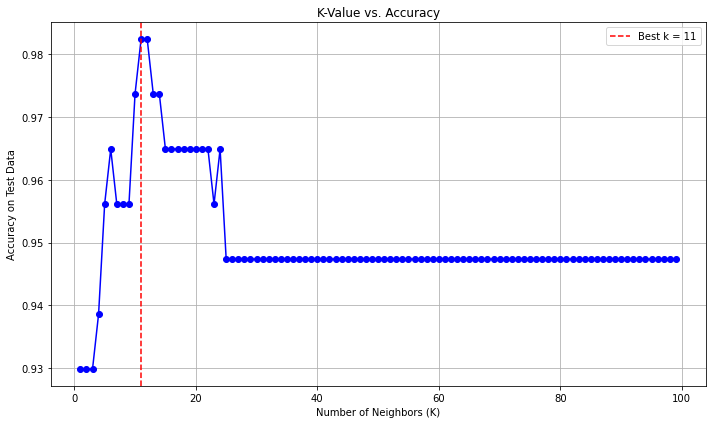

In [66]:
# Plot accuracy vs. K

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), scores, color='blue', marker='o')
plt.title('K-Value vs. Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy on Test Data')
plt.grid(True)
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.tight_layout()
plt.savefig('knn_k_vs_accuracy.png')
plt.show()

In [ ]:
# Train final model
best_model = KNeighborsClassifier(n_jobs=best_k)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(report)